In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [3]:
angle = pd.read_excel('Angle.xls')
frequency = pd.read_excel('Frequency.xls')
voltage = pd.read_excel('Voltage Magnitude.xls')

# Loading Data

In [4]:
voltage.head()

,Timestamp,BADARPUR:Voltage 1:Magnitude,BADARPUR:Voltage A:Magnitude,BADARPUR:Voltage B:Magnitude,BADARPUR:Voltage C:Magnitude
0,2021-09-11 06:12:16.840,133583.2031,134639.6719,132073.1563,134174.7188
1,2021-09-11 06:12:16.880,133604.5938,134631.2500,132072.7500,134180.1563
2,2021-09-11 06:12:16.920,133610.0469,134652.5625,132100.0781,134188.8594
3,2021-09-11 06:12:16.960,133619.9688,134645.3281,132108.8594,134192.7188
4,2021-09-11 06:12:17.000,133609.9844,134651.2656,132082.9063,134199.8125


# Voltage Analysis

<AxesSubplot:>

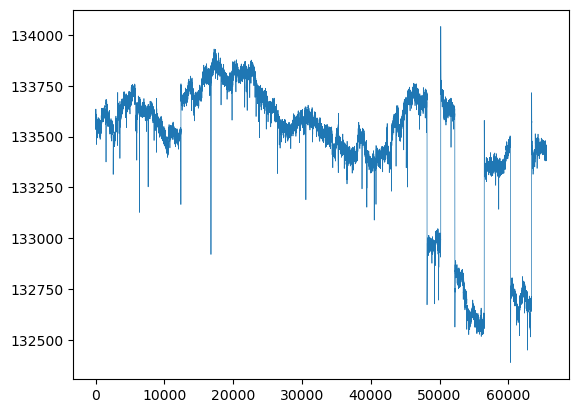

In [5]:
voltage['BADARPUR:Voltage 1:Magnitude'].plot(linewidth = 0.5)

<AxesSubplot:>

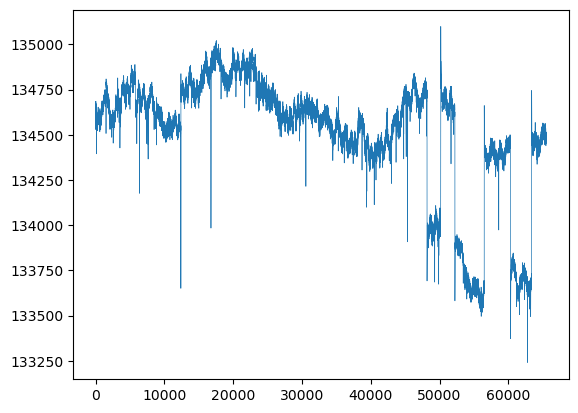

In [7]:
voltage['BADARPUR:Voltage A:Magnitude'].plot(linewidth = 0.5)

<AxesSubplot:>

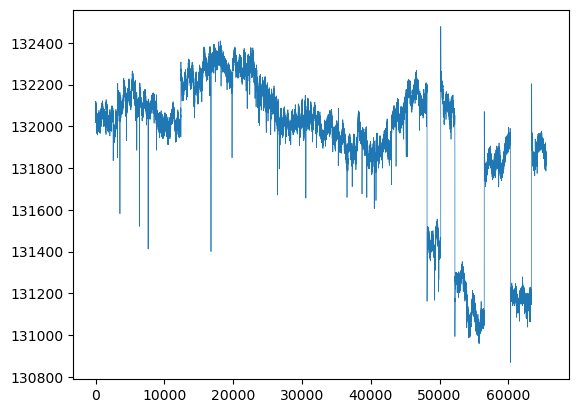

In [8]:
voltage['BADARPUR:Voltage B:Magnitude'].plot(linewidth = 0.5)

<AxesSubplot:>

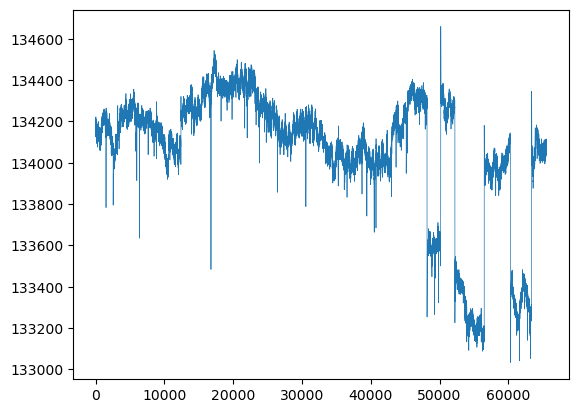

In [9]:
voltage['BADARPUR:Voltage C:Magnitude'].plot(linewidth = 0.5)

In [10]:
voltage.head()

,Timestamp,BADARPUR:Voltage 1:Magnitude,BADARPUR:Voltage A:Magnitude,BADARPUR:Voltage B:Magnitude,BADARPUR:Voltage C:Magnitude
0,2021-09-11 06:12:16.840,133583.2031,134639.6719,132073.1563,134174.7188
1,2021-09-11 06:12:16.880,133604.5938,134631.2500,132072.7500,134180.1563
2,2021-09-11 06:12:16.920,133610.0469,134652.5625,132100.0781,134188.8594
3,2021-09-11 06:12:16.960,133619.9688,134645.3281,132108.8594,134192.7188
4,2021-09-11 06:12:17.000,133609.9844,134651.2656,132082.9063,134199.8125


In [11]:
voltage1 = voltage['BADARPUR:Voltage 1:Magnitude'].copy()
voltageA = voltage['BADARPUR:Voltage A:Magnitude'].copy()
voltageB = voltage['BADARPUR:Voltage B:Magnitude'].copy()
voltageC = voltage['BADARPUR:Voltage C:Magnitude'].copy()

In [ ]:
#### code for Karman Filter

In [15]:
def basic_filter(data, mode='rolling', window=262, threshold=3):
    """Basic Filter.
    
    Mark as outliers the points that are out of the interval:
    (mean - threshold * std, mean + threshold * std ).
    
    Parameters
    ----------
    data : pandas.Series
        The time series to filter.
    mode : str, optional, default: 'rolling'
        Whether to filter in rolling or expanding basis.
    window : int, optional, default: 262
        The number of periods to compute the mean and standard
        deviation.
    threshold : int, optional, default: 3
        The number of standard deviations above the mean.
        
    Returns
    -------
    series : pandas.DataFrame
        Original series and marked outliers.
    """
    msg = f"Type must be of pandas.Series but {type(data)} was passed."
    assert isinstance(data, pd.Series), msg
    
    series = data.copy()
    
    # rolling/expanding objects
    pd_object = getattr(series, mode)(window=window)
    mean = pd_object.mean()
    std = pd_object.std()
    
    upper_bound = mean + threshold * std
    lower_bound = mean - threshold * std
    
    outliers = ~series.between(lower_bound, upper_bound)
    # fill false positives with 0
    outliers.iloc[:window] = np.zeros(shape=window)
    
    series = series.to_frame()
    series['outliers'] = np.array(outliers.astype('int').values)
    series.columns = ['Close', 'Outliers']
    
    return series

# Magnitude Cleaning

In [16]:
cleaned_mag_1 = basic_filter(voltage1)

<AxesSubplot:>

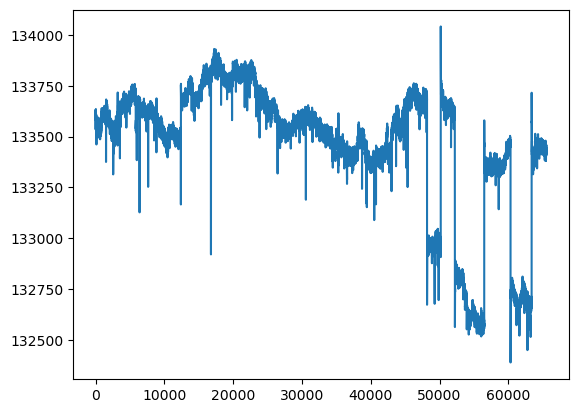

In [17]:
cleaned_mag_1['Close'].plot()

<AxesSubplot:>

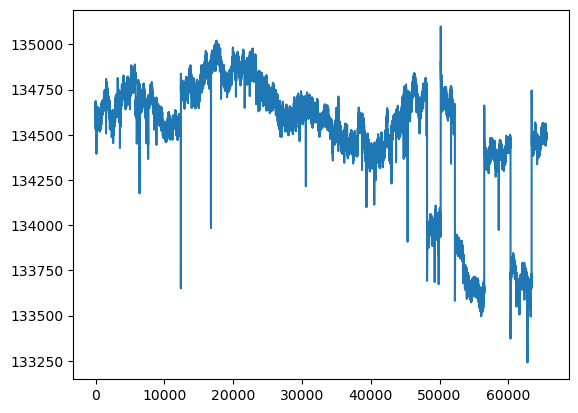

In [18]:
cleaned_mag_A = basic_filter(voltageA)
cleaned_mag_A['Close'].plot()

<AxesSubplot:>

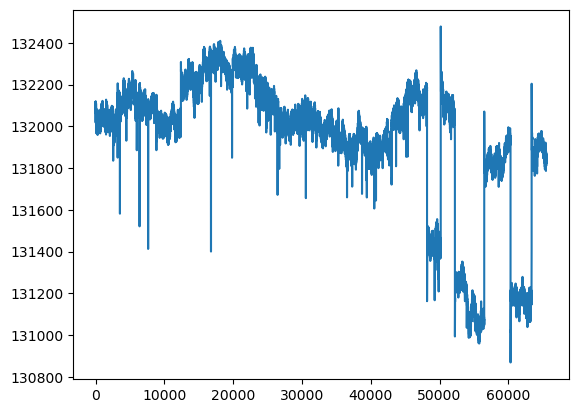

In [46]:
cleaned_mag_B = basic_filter(voltageB)
cleaned_mag_B['Close'].plot()

<AxesSubplot:>

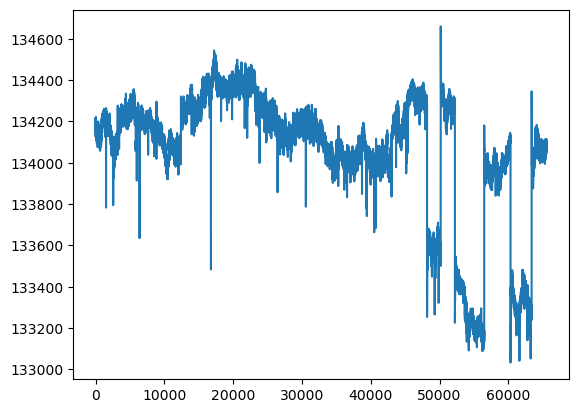

In [48]:
cleaned_mag_C = basic_filter(voltageC)
cleaned_mag_C['Close'].plot()

# Comparision of cleaned data and actual data

### MAG 1

<AxesSubplot:>

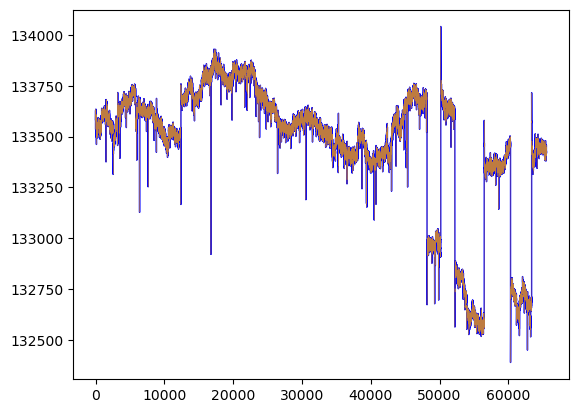

In [42]:
voltage['BADARPUR:Voltage 1:Magnitude'].plot(linewidth = 1, color = 'blue', label = 'real')
cleaned_mag_1['Close'].plot(color = 'orange', label = 'cleaned', linewidth = 0.25, alpha = 0.75)


<AxesSubplot:>

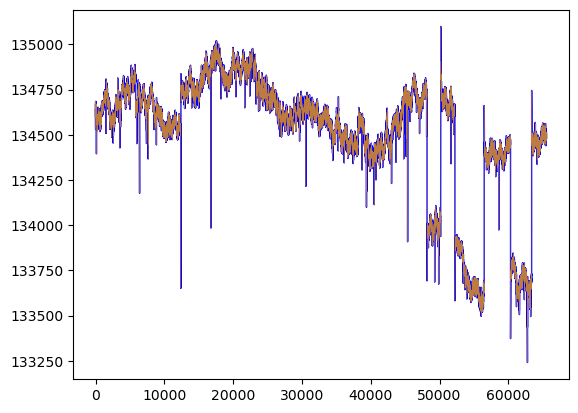

In [43]:
voltage['BADARPUR:Voltage A:Magnitude'].plot(linewidth = 1, color = 'blue', label = 'real')
cleaned_mag_A['Close'].plot(color = 'orange', label = 'cleaned', linewidth = 0.25, alpha = 0.75)

<AxesSubplot:>

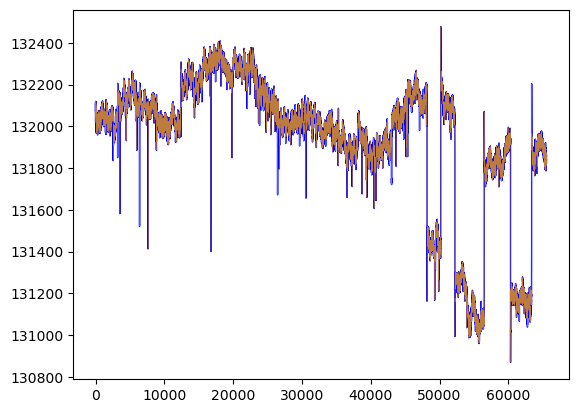

In [49]:
voltage['BADARPUR:Voltage B:Magnitude'].plot(linewidth = 1, color = 'blue', label = 'real')
cleaned_mag_B['Close'].plot(color = 'orange', label = 'cleaned', linewidth = 0.25, alpha = 0.75)

<AxesSubplot:>

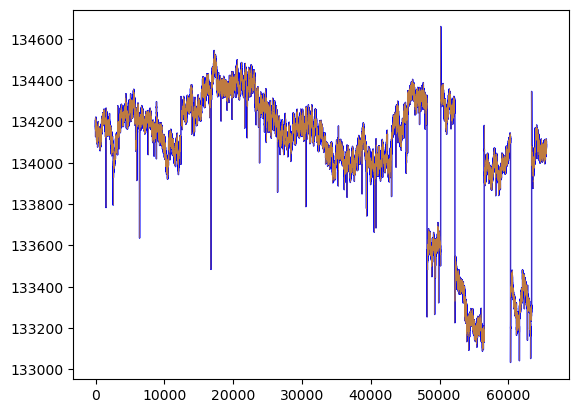

In [50]:
voltage['BADARPUR:Voltage C:Magnitude'].plot(linewidth = 1, color = 'blue', label = 'real')
cleaned_mag_C['Close'].plot(color = 'orange', label = 'cleaned', linewidth = 0.25, alpha = 0.75)

In [52]:
voltage_noise_analysis = voltage.copy()

In [55]:
voltage_noise_analysis['Noise 1'] = voltage_noise_analysis['BADARPUR:Voltage 1:Magnitude'] - cleaned_mag_1['Close']
voltage_noise_analysis['Noise A'] = voltage_noise_analysis['BADARPUR:Voltage A:Magnitude'] - cleaned_mag_A['Close']
voltage_noise_analysis['Noise B'] = voltage_noise_analysis['BADARPUR:Voltage B:Magnitude'] - cleaned_mag_B['Close']
voltage_noise_analysis['Noise C'] = voltage_noise_analysis['BADARPUR:Voltage C:Magnitude'] - cleaned_mag_C['Close']

In [57]:
voltage_noise_analysis.head()

,Timestamp,BADARPUR:Voltage 1:Magnitude,BADARPUR:Voltage A:Magnitude,BADARPUR:Voltage B:Magnitude,BADARPUR:Voltage C:Magnitude,Noise 1,Noise A,Noise B,Noise C
0,2021-09-11 06:12:16.840,133583.2031,134639.6719,132073.1563,134174.7188,0.0,0.0,0.0,0.0
1,2021-09-11 06:12:16.880,133604.5938,134631.2500,132072.7500,134180.1563,0.0,0.0,0.0,0.0
2,2021-09-11 06:12:16.920,133610.0469,134652.5625,132100.0781,134188.8594,0.0,0.0,0.0,0.0
3,2021-09-11 06:12:16.960,133619.9688,134645.3281,132108.8594,134192.7188,0.0,0.0,0.0,0.0
4,2021-09-11 06:12:17.000,133609.9844,134651.2656,132082.9063,134199.8125,0.0,0.0,0.0,0.0


C:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Noise 1', ylabel='count'>

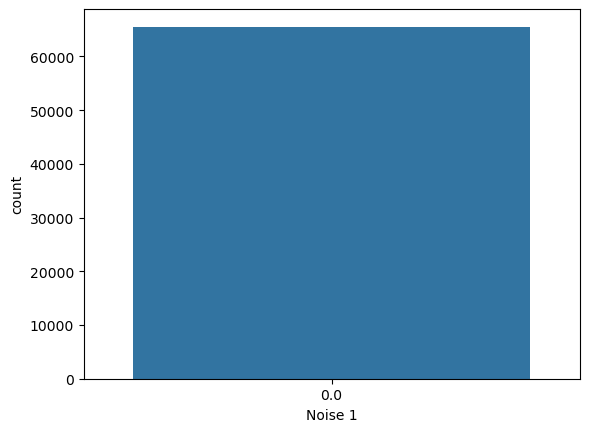

In [60]:
sns.countplot(voltage_noise_analysis['Noise 1'])

C:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Noise A', ylabel='count'>

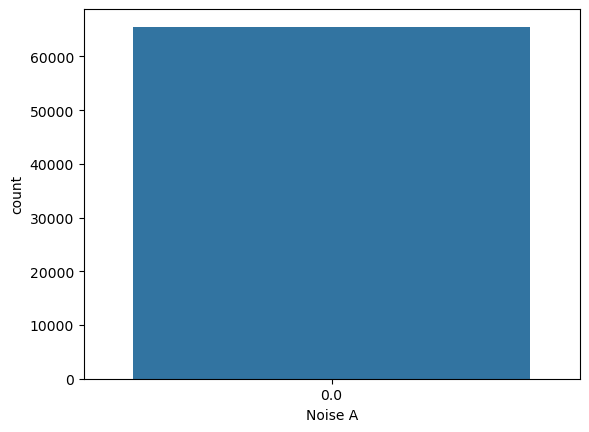

In [63]:
sns.countplot(voltage_noise_analysis['Noise A'])

C:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Noise B', ylabel='count'>

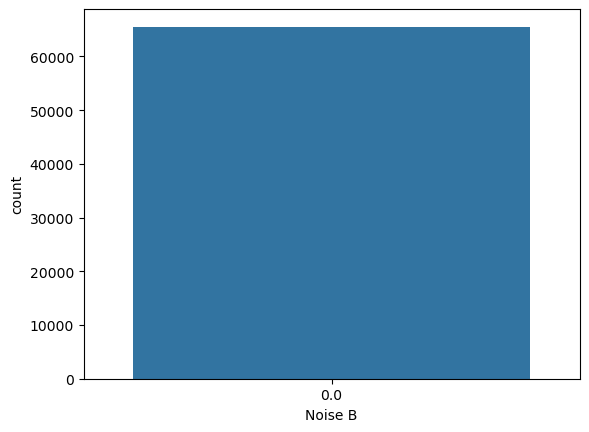

In [62]:
sns.countplot(voltage_noise_analysis['Noise B'])

C:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Noise C', ylabel='count'>

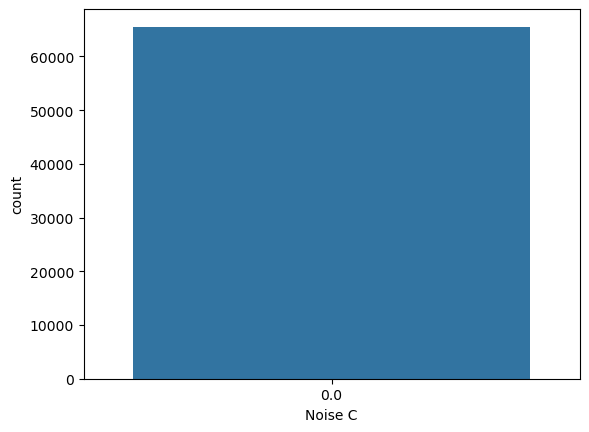

In [61]:
sns.countplot(voltage_noise_analysis['Noise C'])

### NO NOISE DETECTED ACCORDING TO KARMAN FILTER